In [1]:
# !pip install imutils

In [29]:
from imutils.perspective import four_point_transform
import cv2
import numpy as np
from scipy.ndimage import filters, morphology
from skimage.draw import line
from scipy import ndimage, spatial

In [3]:
image = cv2.imread('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/Photo 3130 .jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [4]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None

In [5]:
for c in cnts:
    # Perform contour approximation
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        displayCnt = approx
        break

In [6]:
warped = four_point_transform(image, displayCnt.reshape(4, 2))

In [7]:
cv2.imwrite("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130thresh.png", thresh)
cv2.imwrite("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130warped.png", warped)
cv2.imwrite("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130image.png", image)
cv2.waitKey()

-1

In [ ]:
# cv2.imshow("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130thresh", thresh)
# cv2.imshow("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130warped", warped)
# cv2.imshow("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130image", image)

In [21]:
from PIL import ImageChops, Image

def trim(im, border):
    bg = Image.new(im.mode, im.size, border)
    diff = ImageChops.difference(im, bg)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    else:
        # found no content
        raise ValueError("cannot trim; image was empty")

In [22]:
import cv2

image = cv2.imread('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/Photo 3130.jpg')

In [23]:
trimmed = trim(image, 2)

cv2.imwrite("/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130trimmed.png", trimmed)

AttributeError: 'NoneType' object has no attribute 'mode'

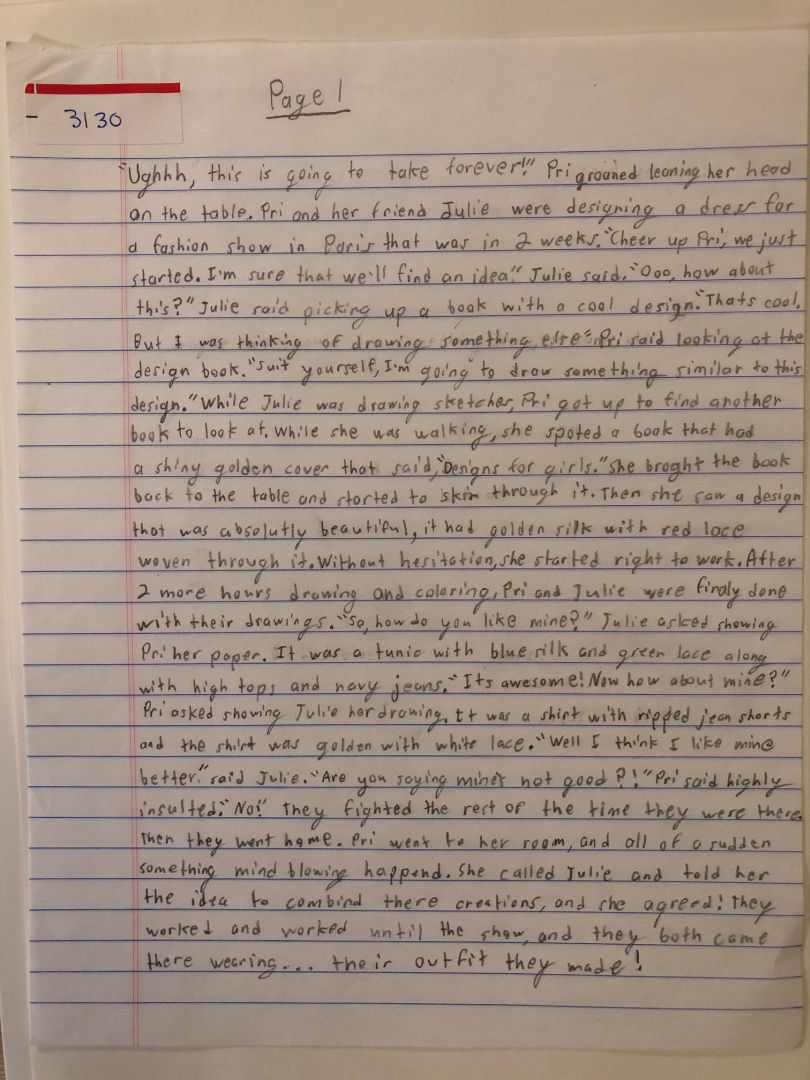

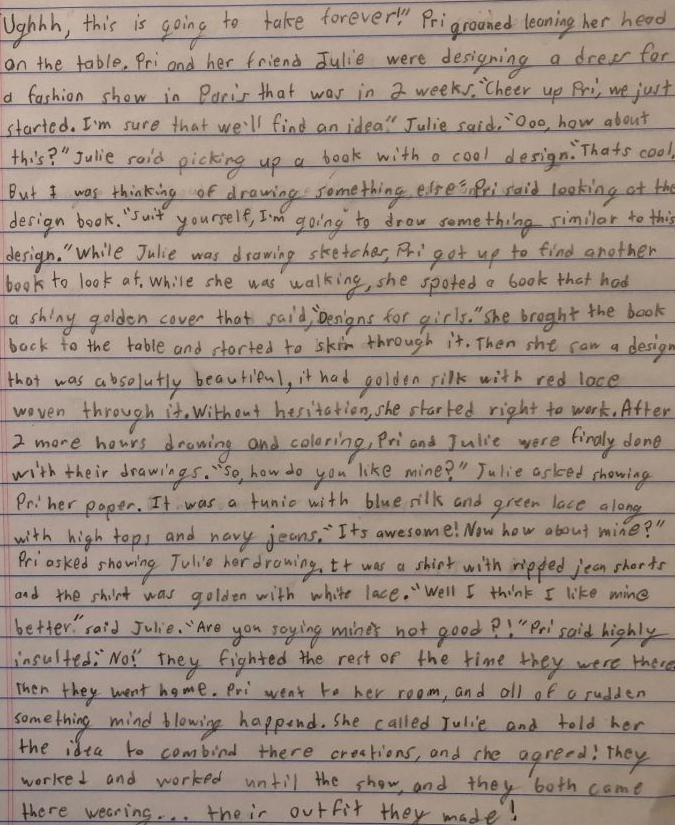

In [20]:
from PIL import Image

#Create an Image Object from an Image
im = Image.open('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/Photo 3130 .jpg')

#Display actual image
im.show()

#left, upper, right, lowe
#Crop
cropped = im.crop((125,150,800,975))

#Display the cropped portion
cropped.show()

#Save the cropped image
cropped.save('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130cropped.png')

In [30]:
def houghLines(img):
    w,h = img.shape
    acc=[]
    for i in range(h):
        rr,cc = line(0, i, w-1, h-i-1)
        acc.append(np.sum(img[rr, cc]))
    mi = np.argmax(acc)
    ret = np.zeros(img.shape, dtype=np.bool)
    rr,cc = line(0, mi, w-1, h-mi-1)
    ret[rr,cc]=True
    return ret

In [31]:
def removeLines(img):
    imggray = np.mean(img, -1)
    imfft = np.fft.fft2(imggray)
    imffts = np.fft.fftshift(imfft)

    mags = np.abs(imffts)
    angles = np.angle(imffts)

    visual = np.log(mags)


    visual3 = np.abs(visual.astype(np.int16) - np.mean(visual))

    ret = houghLines(visual3)
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
    ret = morphology.binary_dilation(ret )
#     ret = morphology.binary_dilation(ret )
#     ret = morphology.binary_dilation(ret )
#     ret = morphology.binary_dilation(ret )
#     ret = morphology.binary_dilation(ret )
#     ret = morphology.binary_dilation(ret )
    w,h=ret.shape
    ret[w//2-3:w//2+3, h//2-3:h//2+3]=False


    delta = np.mean(visual[ret]) - np.mean(visual)


    visual_blured = ndimage.gaussian_filter(visual, sigma=4)



    visual[ret] =visual_blured[ret]


    newmagsshift = np.exp(visual)

    newffts = newmagsshift * np.exp(1j*angles)

    newfft = np.fft.ifftshift(newffts)

    imrev = np.fft.ifft2(newfft)

    newim2 =  np.abs(imrev).astype(np.uint8)


    newim2 = np.maximum(newim2, imggray)

    return newim2

In [32]:
crop2 = removeLines(cropped)

In [35]:
cv2.imwrite('/home/cwhyse/BloomProj/scribble-stadium-ds/data_management/autopreprocess_testing/data/transformedData/Photo 3130crop2.png', crop2)

True